In [88]:
import requests

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px


In [142]:

start_date = int(pd.to_datetime('2024-01-01').timestamp())

end_date = int(pd.to_datetime('2025-01-01').timestamp())




response = requests.get(f'https://sensornet.nl/dataserver3/event/collection/nina_events/stream?conditions%5B0%5D%5B%5D=time&conditions%5B0%5D%5B%5D=%3E%3D&conditions%5B0%5D%5B%5D={start_date}&conditions%5B1%5D%5B%5D=time&conditions%5B1%5D%5B%5D=%3C&conditions%5B1%5D%5B%5D={end_date}&conditions%5B2%5D%5B%5D=label&conditions%5B2%5D%5B%5D=in&conditions%5B2%5D%5B2%5D%5B%5D=21&conditions%5B2%5D%5B2%5D%5B%5D=32&conditions%5B2%5D%5B2%5D%5B%5D=33&conditions%5B2%5D%5B2%5D%5B%5D=34&args%5B%5D=aalsmeer&args%5B%5D=schiphol&fields%5B%5D=time&fields%5B%5D=location_short&fields%5B%5D=location_long&fields%5B%5D=duration&fields%5B%5D=SEL&fields%5B%5D=SELd&fields%5B%5D=SELe&fields%5B%5D=SELn&fields%5B%5D=SELden&fields%5B%5D=SEL_dB&fields%5B%5D=lasmax_dB&fields%5B%5D=callsign&fields%5B%5D=type&fields%5B%5D=altitude&fields%5B%5D=distance&fields%5B%5D=winddirection&fields%5B%5D=windspeed&fields%5B%5D=label&fields%5B%5D=hex_s&fields%5B%5D=registration&fields%5B%5D=icao_type&fields%5B%5D=serial&fields%5B%5D=operator&fields%5B%5D=tags')




colnames = pd.DataFrame(response.json()['metadata'])

data = pd.DataFrame(response.json()['rows'])

data.columns = colnames.headers




data['time'] = pd.to_datetime(data['time'], unit = 's')




print(data['time'].min(),data['time'].max())




data.head()



2024-01-01 11:50:05 2024-12-31 09:58:31


headers,id,location_short,location_long,time,SELd,SELe,SELn,SELden,SEL,SEL_dB,...,winddirection,callsign,type,tags,duration,hex_s,registration,icao_type,serial,operator
0,111529741,Aa,Aalsmeerderweg,2024-01-01 11:52:06,400042000.0,0.0,0.0,400042000,400042000,86.021054,...,255.0,KLM67F,Embraer ERJ 170-200 STD,Aalsmeerbaan36R_T,41,4855D1,PH-EXO,E75L,17000668,KLM Cityhopper
1,111529751,Aa,Aalsmeerderweg,2024-01-01 11:54:27,988093000.0,0.0,0.0,988093000,988093000,89.947978,...,255.0,CPA270,None,Aalsmeerbaan18L_T,55,789230,None,None,None,None
2,111529761,Aa,Aalsmeerderweg,2024-01-01 11:58:17,458855000.0,0.0,0.0,458855000,458855000,86.616752,...,255.0,AEE625,None,Aalsmeerbaan18L_T,68,46B823,None,None,None,None
3,111529771,Aa,Aalsmeerderweg,2024-01-01 12:00:09,421943000.0,0.0,0.0,421943000,421943000,86.252535,...,253.0,KLM35F,Boeing 737-800,Oostbaan04_T,42,485A32,PH-BCG,B738,62578,KLM Royal Dutch Airlines
4,111529781,Aa,Aalsmeerderweg,2024-01-01 12:01:51,150207000.0,0.0,0.0,150207000,150207000,81.766905,...,253.0,KLM47X,None,Aalsmeerbaan36R_T,53,4864EF,None,None,None,None


In [143]:
# Load the temperature data, skipping metadata lines (usually around 50 lines)
temp_df = pd.read_csv("etmgeg_240.txt", skiprows=50)
temp_df['date'] = pd.to_datetime(temp_df['YYYYMMDD'], format='%Y%m%d')
# Strip whitespace van kolomnamen
temp_df.columns = temp_df.columns.str.strip()
# Optioneel: kolomnamen naar lowercase en underscores

data['date'] = pd.to_datetime(data['time']).dt.date
temp_df['date'] = temp_df['date'].dt.date
temp_df['TG_C'] = temp_df['TG'] / 10.0  # Daily mean temperature
data = data.merge(temp_df[['date', 'TG_C']], on='date', how='left')

data.head()

/var/folders/nm/nkmq_t2d55v8vf6mgmjcwc4h0000gn/T/ipykernel_67557/1269951167.py:2: DtypeWarning:

Columns (9,10,13,15,18,19,20,22,23,24,26,27,28,29,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.



,id,location_short,location_long,time,SELd,SELe,SELn,SELden,SEL,SEL_dB,...,type,tags,duration,hex_s,registration,icao_type,serial,operator,date,TG_C
0,111529741,Aa,Aalsmeerderweg,2024-01-01 11:52:06,400042000.0,0.0,0.0,400042000,400042000,86.021054,...,Embraer ERJ 170-200 STD,Aalsmeerbaan36R_T,41,4855D1,PH-EXO,E75L,17000668,KLM Cityhopper,2024-01-01,7.9
1,111529751,Aa,Aalsmeerderweg,2024-01-01 11:54:27,988093000.0,0.0,0.0,988093000,988093000,89.947978,...,None,Aalsmeerbaan18L_T,55,789230,None,None,None,None,2024-01-01,7.9
2,111529761,Aa,Aalsmeerderweg,2024-01-01 11:58:17,458855000.0,0.0,0.0,458855000,458855000,86.616752,...,None,Aalsmeerbaan18L_T,68,46B823,None,None,None,None,2024-01-01,7.9
3,111529771,Aa,Aalsmeerderweg,2024-01-01 12:00:09,421943000.0,0.0,0.0,421943000,421943000,86.252535,...,Boeing 737-800,Oostbaan04_T,42,485A32,PH-BCG,B738,62578,KLM Royal Dutch Airlines,2024-01-01,7.9
4,111529781,Aa,Aalsmeerderweg,2024-01-01 12:01:51,150207000.0,0.0,0.0,150207000,150207000,81.766905,...,None,Aalsmeerbaan36R_T,53,4864EF,None,None,None,None,2024-01-01,7.9


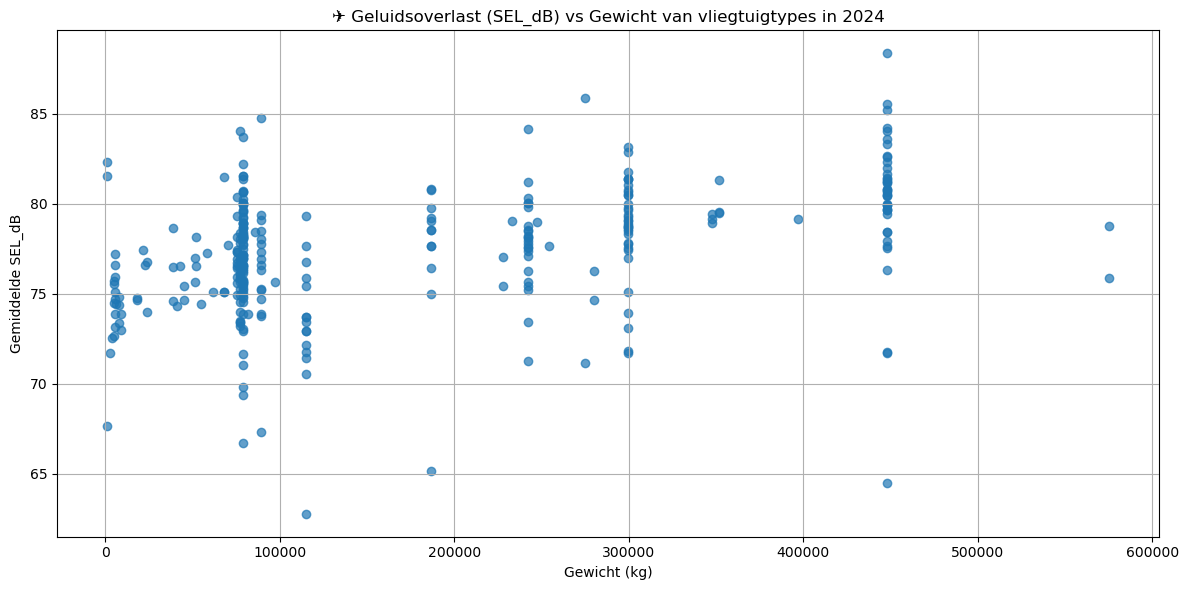

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 1. Laad het CSV-bestand met type, gewicht en capaciteit
types_df = pd.read_csv("Vliegtuigtypes_met_aangevuld_gewicht.csv")

# ✅ 2. Corrigeer eventuele naamverschillen in je data
data['type'] = data['type'].replace('Embraer ERJ190-100STD', 'Embraer ERJ 190-100 STD')

# ✅ 3. Bereken gemiddelde SEL_dB per vliegtuigtype
avg_sel_by_type = data.groupby('type')['SEL_dB'].mean().reset_index(name='gemiddelde_SEL_dB')

# ✅ 4. Merge met het gewicht
merged = avg_sel_by_type.merge(types_df[['type', 'gewicht_kg']], on='type', how='left')

# ✅ 5. Verwijder types zonder gewicht
merged = merged.dropna(subset=['gewicht_kg'])

# ✅ 6. Plot maken
plt.figure(figsize=(12, 6))
plt.scatter(merged['gewicht_kg'], merged['gemiddelde_SEL_dB'], alpha=0.7)


# Aslabels en opmaak
plt.title("✈️ Geluidsoverlast (SEL_dB) vs Gewicht van vliegtuigtypes in 2024")
plt.xlabel("Gewicht (kg)")
plt.ylabel("Gemiddelde SEL_dB")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/nm/nkmq_t2d55v8vf6mgmjcwc4h0000gn/T/ipykernel_67557/1688889578.py:19: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.



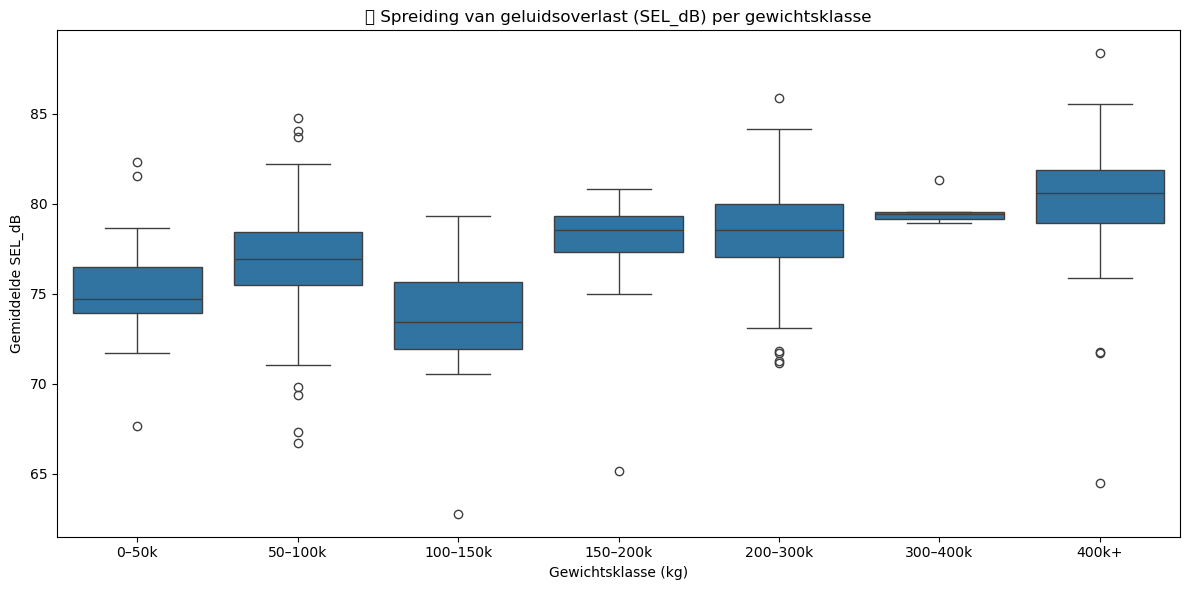

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Maak gewichtsklassen (binnetjes)
bins = [0, 50000, 100000, 150000, 200000, 300000, 400000, 600000]
labels = ['0–50k', '50–100k', '100–150k', '150–200k', '200–300k', '300–400k', '400k+']
merged['gewichtsklasse'] = pd.cut(merged['gewicht_kg'], bins=bins, labels=labels)

# Voeg ook SEL_dB data toe
avg_per_type = data.groupby('type')['SEL_dB'].mean().reset_index()
merged = merged.merge(avg_per_type, on='type', how='left')

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged, x='gewichtsklasse', y='SEL_dB')
plt.title("📦 Spreiding van geluidsoverlast (SEL_dB) per gewichtsklasse")
plt.xlabel("Gewichtsklasse (kg)")
plt.ylabel("Gemiddelde SEL_dB")
plt.tight_layout()
plt.show()

In [162]:


# Stap 2 – gemiddelde SEL_dB per type
avg_sel = data.groupby('type')['SEL_dB'].mean().reset_index(name='gemiddelde_SEL_dB')

# Stap 3 – merge met gewicht
merged = avg_sel.merge(types_df[['type', 'gewicht_kg']], on='type', how='left').dropna()

# Stap 4 – heatmap maken
fig = px.density_heatmap(
    merged,
    x='gewicht_kg',
    y='gemiddelde_SEL_dB',
    nbinsx=30,
    nbinsy=30,
    color_continuous_scale='Viridis',
    labels={
        'gewicht_kg': 'Gewicht (kg)',
        'gemiddelde_SEL_dB': 'Gemiddelde SEL_dB'
    },
    title='🔳 Dichtheid van vliegtuigtypes: Gewicht vs Geluidsoverlast'
)

# Laat figuur zien
fig.show()

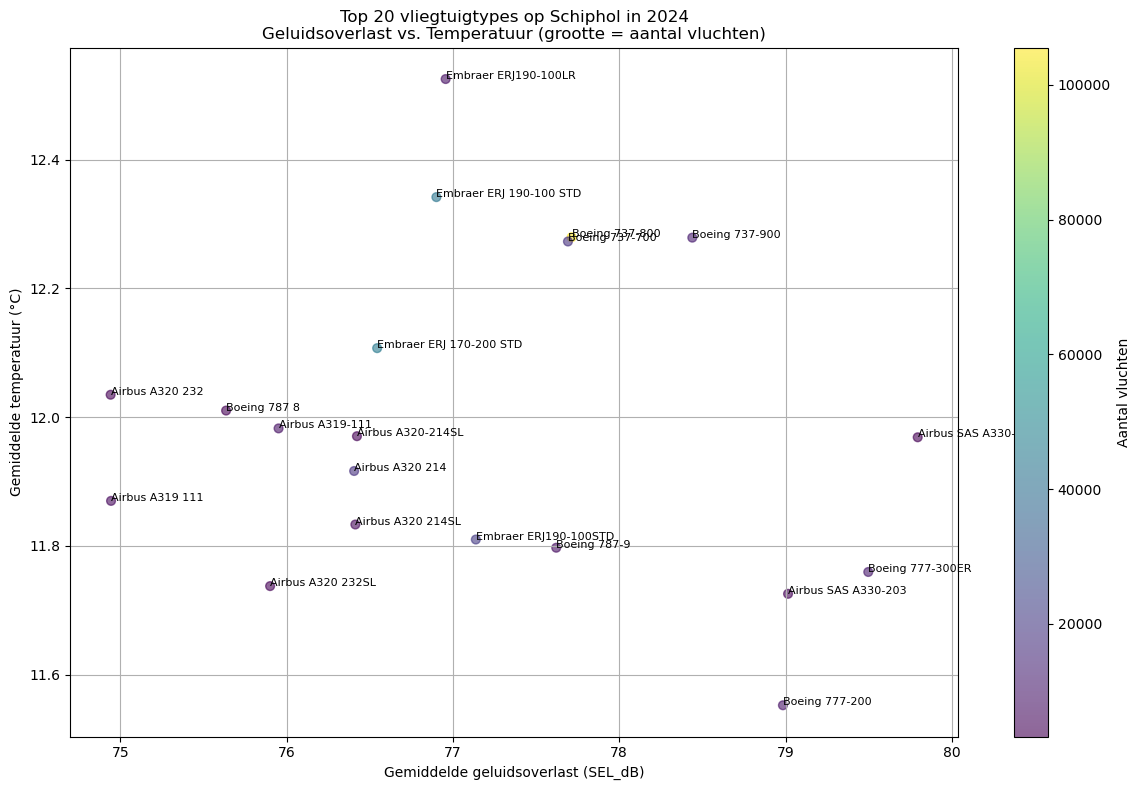

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Groepeer de data op vliegtuigtype
bubble_data = data.groupby('type').agg(
    aantal_vluchten=('type', 'count'),
    gemiddelde_geluidsoverlast=('SEL_dB', 'mean'),
    gemiddelde_temp=('TG_C', 'mean')
).reset_index()

# Sorteer op aantal vluchten en pak de top 20 meest voorkomende types
bubble_data = bubble_data.sort_values(by='aantal_vluchten', ascending=False).head(20)

# Maak de plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    bubble_data['gemiddelde_geluidsoverlast'],
    bubble_data['gemiddelde_temp'],
    s=40 ,   # schaal de bubbelgrootte
    alpha=0.6,
    c=bubble_data['aantal_vluchten'],
    cmap='viridis'
)

# Voeg labels toe aan de bubbels
for i, row in bubble_data.iterrows():
    plt.annotate(row['type'], (row['gemiddelde_geluidsoverlast'], row['gemiddelde_temp']), fontsize=8)

# Titels en labels
plt.title('Top 20 vliegtuigtypes op Schiphol in 2024\nGeluidsoverlast vs. Temperatuur (grootte = aantal vluchten)')
plt.xlabel('Gemiddelde geluidsoverlast (SEL_dB)')
plt.ylabel('Gemiddelde temperatuur (°C)')
plt.colorbar(scatter, label='Aantal vluchten')
plt.grid(True)
plt.tight_layout()
plt.show()

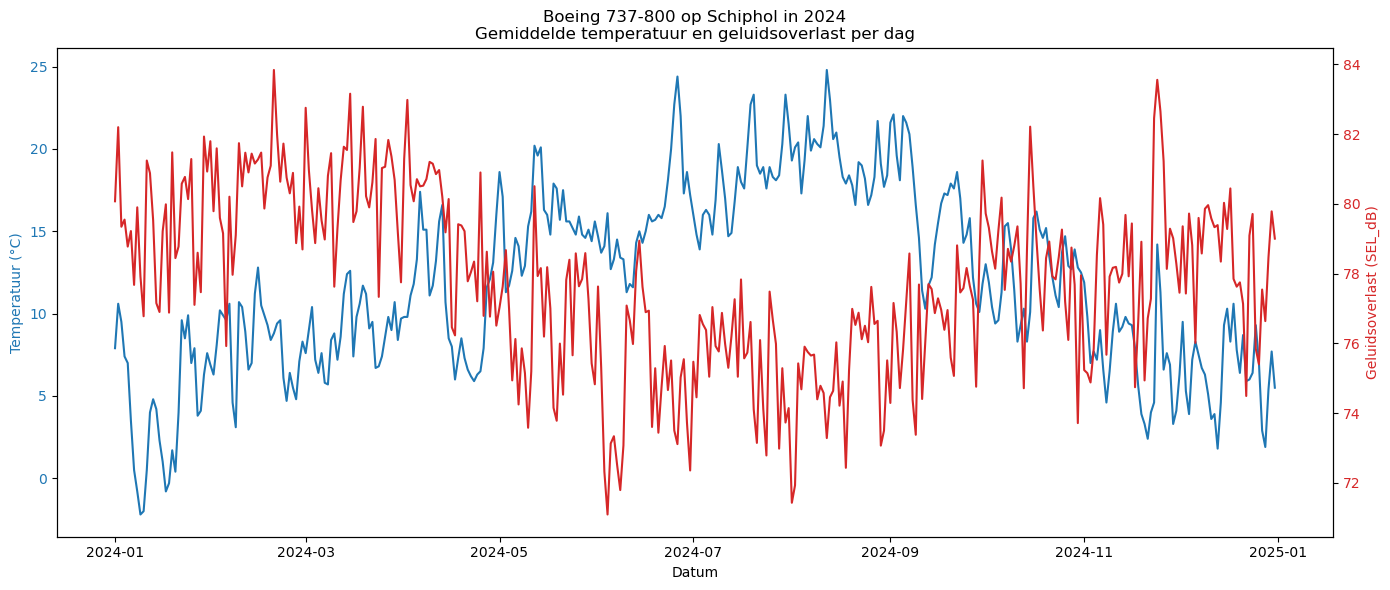

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter alleen op Boeing 737-800
b737_data = data[data['type'] == 'Boeing 737-800'].copy()

# Zet tijd om naar datum (zonder tijdstip)
b737_data['date'] = pd.to_datetime(b737_data['time']).dt.date

# Bereken per dag gemiddelde temperatuur en geluid
daggemiddelden = b737_data.groupby('date').agg(
    gemiddelde_temp=('TG_C', 'mean'),
    gemiddelde_geluid=('SEL_dB', 'mean')
).reset_index()

# Maak plot met dubbele y-as
fig, ax1 = plt.subplots(figsize=(14, 6))

# Y1: Temperatuur
ax1.plot(daggemiddelden['date'], daggemiddelden['gemiddelde_temp'], color='tab:blue', label='Gem. temperatuur (°C)')
ax1.set_xlabel('Datum')
ax1.set_ylabel('Temperatuur (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Y2: Geluidsoverlast
ax2 = ax1.twinx()
ax2.plot(daggemiddelden['date'], daggemiddelden['gemiddelde_geluid'], color='tab:red', label='Gem. SEL_dB')
ax2.set_ylabel('Geluidsoverlast (SEL_dB)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Titel en layout
plt.title('Boeing 737-800 op Schiphol in 2024\nGemiddelde temperatuur en geluidsoverlast per dag')
fig.tight_layout()
plt.show()

In [124]:
temp_df.head()

,# STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24,date
0,240,19510101,188,77,87,195,18,41,24,,...,,,7,90,98,6,73,20,,1951-01-01
1,240,19510102,153,41,41,82,4,10,21,,...,,,8,93,98,9,88,1,,1951-01-02
2,240,19510103,203,15,21,51,24,0,3,,...,,,6,94,100,21,83,12,,1951-01-03
3,240,19510104,193,77,77,103,15,51,1,,...,,,7,94,97,12,89,8,,1951-01-04
4,240,19510105,207,82,87,144,21,36,24,,...,,,8,95,100,5,89,14,,1951-01-05


In [125]:
temp_df.columns

Index(['# STN', 'YYYYMMDD', 'DDVEC', 'FHVEC', '   FG', '  FHX', ' FHXH',
       '  FHN', ' FHNH', '  FXX', ' FXXH', '   TG', '   TN', '  TNH', '   TX',
       '  TXH', ' T10N', 'T10NH', '   SQ', '   SP', '    Q', '   DR', '   RH',
       '  RHX', ' RHXH', '   PG', '   PX', '  PXH', '   PN', '  PNH', '  VVN',
       ' VVNH', '  VVX', ' VVXH', '   NG', '   UG', '   UX', '  UXH', '   UN',
       '  UNH', ' EV24', 'date'],
      dtype='object')

In [90]:
filtered = data[(data['callsign'] == 'TRA5234')]
filtered.head(20)

headers,id,location_short,location_long,time,SELd,SELe,SELn,SELden,SEL,SEL_dB,...,winddirection,callsign,type,tags,duration,hex_s,registration,icao_type,serial,operator
4126,132521421,Ui,Uiterweg,2025-03-23 22:57:36,0,0,440314000,4403140000,440314000,86.437624,...,353.0,TRA5234,Boeing 737-800,Zwanenburgbaan36C_L,78,4853D4,PH-HXK,B738,62157,Transavia
5010,132526671,Co,Copierstraat,2025-03-23 22:56:42,0,0,95324800,953248000,95324800,79.792059,...,353.0,TRA5234,Boeing 737-800,Zwanenburgbaan36C_L,95,4853D4,PH-HXK,B738,62157,Transavia
6175,132528981,Ku,Kudelstaartseweg,2025-03-23 22:56:55,0,0,26492800,264928000,26492800,74.231281,...,353.0,TRA5234,Boeing 737-800,Zwanenburgbaan36C_L,102,4853D4,PH-HXK,B738,62157,Transavia


In [146]:
data['type'].nunique()

606

In [147]:
# Haal unieke waarden op uit de kolom 'type'
unique_types = data['type'].dropna().unique()

# Zet om naar DataFrame
types_df = pd.DataFrame(unique_types, columns=['type'])

# Sla op als CSV
types_df.to_csv("unieke_types.csv", index=False)

In [92]:
data.columns

Index(['id', 'location_short', 'location_long', 'time', 'SELd', 'SELe', 'SELn',
       'SELden', 'SEL', 'SEL_dB', 'lasmax_dB', 'distance', 'altitude', 'label',
       'windspeed', 'winddirection', 'callsign', 'type', 'tags', 'duration',
       'hex_s', 'registration', 'icao_type', 'serial', 'operator'],
      dtype='object', name='headers')

In [93]:
data.isna().sum()

headers
id                   0
location_short       0
location_long        0
time                 0
SELd                 0
SELe                 0
SELn                 0
SELden               0
SEL                  0
SEL_dB               0
lasmax_dB            0
distance             0
altitude             0
label                0
windspeed           41
winddirection       41
callsign             0
type              3183
tags                 3
duration             0
hex_s                0
registration      3183
icao_type         3183
serial            3183
operator          3183
dtype: int64

In [94]:
missing_percent = data.isna().mean() * 100
missing_percent = missing_percent.round(2).sort_values(ascending=False)
print(missing_percent)

headers
operator          31.87
serial            31.87
icao_type         31.87
registration      31.87
type              31.87
winddirection      0.41
windspeed          0.41
tags               0.03
label              0.00
hex_s              0.00
duration           0.00
callsign           0.00
id                 0.00
location_short     0.00
distance           0.00
lasmax_dB          0.00
SEL_dB             0.00
SEL                0.00
SELden             0.00
SELn               0.00
SELe               0.00
SELd               0.00
time               0.00
location_long      0.00
altitude           0.00
dtype: float64


In [95]:
data.dtypes

headers
id                         int64
location_short            object
location_long             object
time              datetime64[ns]
SELd                       int64
SELe                       int64
SELn                       int64
SELden                     int64
SEL                        int64
SEL_dB                   float64
lasmax_dB                float64
distance                 float64
altitude                 float64
label                      int64
windspeed                float64
winddirection            float64
callsign                  object
type                      object
tags                      object
duration                   int64
hex_s                     object
registration              object
icao_type                 object
serial                    object
operator                  object
dtype: object

<Axes: xlabel='headers', ylabel='headers'>

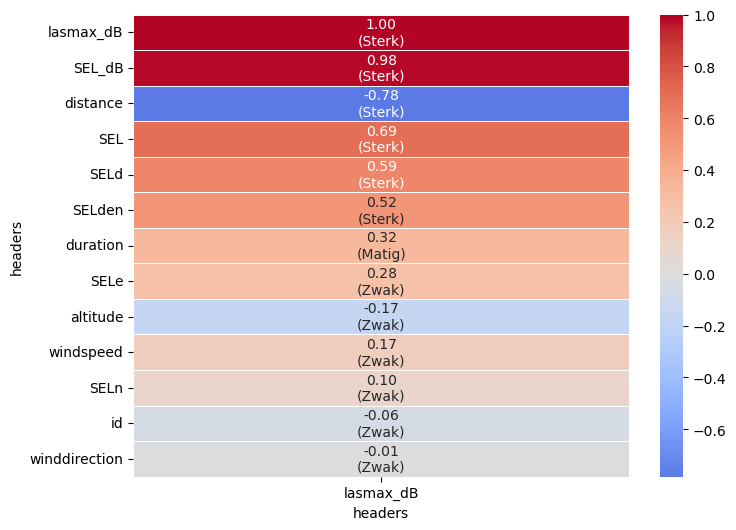

In [96]:

 # Compute correlation matrix

correlatie_matrix = data.corr(numeric_only=True)
    
 # Sorteer op absolute correlatie met 'Aantal Ritten'
correlatie_lasmax_dB = correlatie_matrix[['lasmax_dB']].dropna()
correlatie_lasmax_dB['abs_corr'] = correlatie_lasmax_dB['lasmax_dB'].abs()  # Voeg absolute waarden toe
    
    # Classificeer de correlatie volgens de tabel
def classificatie(r):
        if abs(r) > 0.5:
            return "Sterk"
        elif abs(r) > 0.3:
            return "Matig"
        elif abs(r) > 0:
            return "Zwak"
        else:
            return "Geen"
    
# Voeg de classificatie toe
correlatie_lasmax_dB['Sterkte'] = correlatie_lasmax_dB['lasmax_dB'].apply(classificatie)
    
# Sorteer en verwijder helper kolom
correlatie_lasmax_dB = correlatie_lasmax_dB.sort_values(by='abs_corr', ascending=False).drop(columns=['abs_corr'])
    
 # Maak aangepaste annotaties met zowel de correlatie als de classificatie
annotaties = correlatie_lasmax_dB.apply(lambda row: f"{row['lasmax_dB']:.2f}\n({row['Sterkte']})", axis=1)

    

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
        correlatie_lasmax_dB[['lasmax_dB']], 
        annot=annotaties.values.reshape(-1,1),  # Gebruik aangepaste annotaties
        cmap="coolwarm", fmt="", linewidths=0.5, center=0, ax=ax
    )


In [97]:
fig=px.histogram(
    data,
    'lasmax_dB'
)

fig.show()

In [98]:
fig = px.scatter(
    data,
    x='lasmax_dB',
    y='altitude',
    title='Lasmax (dB) vs Altitude',
    labels={'altitude': 'Altitude (m)', 'lasmax_dB': 'Lasmax (dB)'},
    opacity=0.6
)
fig.show()

In [99]:
fig = px.scatter(
    data,
    x='lasmax_dB',
    y='distance',
    title='Lasmax (dB) vs Altitude',
    labels={'altitude': 'Altitude (m)', 'lasmax_dB': 'Lasmax (dB)'},
    opacity=0.6
)
fig.show()

In [100]:
fig = px.scatter(
    data,
    x='lasmax_dB',
    y='duration',
    title='Lasmax (dB) vs Altitude',
    labels={'altitude': 'Altitude (m)', 'lasmax_dB': 'Lasmax (dB)'},
    opacity=0.6
)
fig.show()

In [101]:
import folium
 
# Create a map centered around Aalsmeer
m = folium.Map(location=[52.2606, 4.7594], zoom_start=11)
 
# Add Schiphol to the map
folium.Marker([52.3105, 4.7683], popup='Schiphol', icon=folium.Icon(icon='plane', prefix='fa', color='orange')).add_to(m)
 
# List of measurement stations with their coordinates
stations = {
    'Aalsmeerderweg': [52.271712, 4.772485],
    'Darwinstraat': [52.234322, 4.759092],
    'Uiterweg': [52.263306, 4.732377],
    'Copierstraat': [52.228925, 4.739004],
    'Kudelstaartseweg': [52.234885, 4.748050],
    'Blaauwstraat': [52.264531, 4.774595],
    'Hornweg': [52.268712, 4.787693]
}
 
# Add the measurement stations to the map
for station, coords in stations.items():
    folium.Marker(coords, popup=station, icon=folium.Icon(icon='m', color='red')).add_to(m)
 
# Draw a circle with a radius of 4000 meters around all stations
for i in stations:
    folium.Circle(
        location=stations[i],
        radius=4000,
        color='green',
        fill=True,
        fill_opacity=0.2
    ).add_to(m)
 
runways = [
    ([(52.362423, 4.711867), (52.328537, 4.708903)], 'Polderbaan'),  
    ([(52.316809, 4.745912), (52.318347, 4.797313)], 'Buitenveldertbaan'),  
    ([(52.321423, 4.780239), (52.291093, 4.777364)], 'Aalsmeerbaan'),  
    ([(52.300436, 4.783654), (52.313843, 4.802885)], 'Oostbaan'),    
    ([(52.302213, 4.737438), (52.331181, 4.740188)], 'Zwanenburgbaan'),  
    ([(52.288182, 4.734371), (52.304496, 4.777672)], 'Kaagbaan'),
]
 
# Add the runways to the map
for runway_coords, runway_name in runways:
    folium.PolyLine(runway_coords, color='yellow', weight=5).add_to(m)
    midpoint = [(runway_coords[0][0] + runway_coords[1][0]) / 2, (runway_coords[0][1] + runway_coords[1][1]) / 2]
    folium.Marker(midpoint, popup=runway_name, icon=folium.Icon(icon='plane', prefix='fa', color='red')).add_to(m)
 
# Add a legend to the map
legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 200px; height: 150px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white; opacity: 0.8;">
&emsp;<b>Legend</b><br>
&emsp;<i class="fa fa-plane fa-2x" style="color:orange"></i>&emsp;Schiphol<br>
&emsp;<i class="fa fa-map-marker fa-2x" style="color:red"></i>&emsp;Measurement Stations<br>
&emsp;<i class="fa fa-circle fa-2x" style="color:green"></i>&emsp;4000m Radius<br>
&emsp;<i class="fa fa-plane fa-2x" style="color:red"></i>&emsp;Runways<br>
</div>
'''
 
m.get_root().html.add_child(folium.Element(legend_html))
 
# Display the map
m.save('aalsmeer_map.html')
m

In [102]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Load the data
df = pd.read_csv("nl.csv")

# Clean and filter rows with valid coordinates and population
df = df.dropna(subset=['lat', 'lng', 'population'])

# Create base map centered around the Netherlands
m = folium.Map(location=[52.308056, 4.764167], zoom_start=11)

# Create data for the heatmap: [lat, lng, weight]
heat_data = [[row['lat'], row['lng'], row['population']] for index, row in df.iterrows()]

# Add the HeatMap layer
HeatMap(heat_data, radius=40, blur=10, max_zoom=10).add_to(m)

# Save or display map
m.save("netherlands_population_density_heatmap.html")
m

In [116]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# --- Load population data ---
df = pd.read_csv("nl.csv")
df = df.dropna(subset=['lat', 'lng', 'population'])

# --- Create base map centered around Aalsmeer ---
m = folium.Map(location=[52.2606, 4.7594], zoom_start=11)

# --- Add population density heatmap ---
heat_data = [[row['lat'], row['lng'], row['population']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=45, blur=15, max_zoom=10).add_to(m)

# --- Schiphol Airport Marker ---
folium.Marker(
    [52.3105, 4.7683],
    popup='Schiphol',
    icon=folium.Icon(icon='plane', prefix='fa', color='orange')
).add_to(m)

# --- Measurement Stations ---
stations = {
    'Aalsmeerderweg': [52.271712, 4.772485],
    'Darwinstraat': [52.234322, 4.759092],
    'Uiterweg': [52.263306, 4.732377],
    'Copierstraat': [52.228925, 4.739004],
    'Kudelstaartseweg': [52.234885, 4.748050],
    'Blaauwstraat': [52.264531, 4.774595],
    'Hornweg': [52.268712, 4.787693]
}

for station, coords in stations.items():
    folium.Marker(coords, popup=station, icon=folium.Icon(icon='m', color='red')).add_to(m)
    folium.Circle(
        location=coords,
        radius=4000,
        color='green',
        fill=True,
        fill_opacity=0.2
    ).add_to(m)

# --- Runways ---
runways = [
    ([(52.362423, 4.711867), (52.328537, 4.708903)], 'Polderbaan'),  
    ([(52.316809, 4.745912), (52.318347, 4.797313)], 'Buitenveldertbaan'),  
    ([(52.321423, 4.780239), (52.291093, 4.777364)], 'Aalsmeerbaan'),  
    ([(52.300436, 4.783654), (52.313843, 4.802885)], 'Oostbaan'),    
    ([(52.302213, 4.737438), (52.331181, 4.740188)], 'Zwanenburgbaan'),  
    ([(52.288182, 4.734371), (52.304496, 4.777672)], 'Kaagbaan'),
]

for runway_coords, runway_name in runways:
    folium.PolyLine(runway_coords, color='yellow', weight=5).add_to(m)
    midpoint = [
        (runway_coords[0][0] + runway_coords[1][0]) / 2,
        (runway_coords[0][1] + runway_coords[1][1]) / 2
    ]
    folium.Marker(midpoint, popup=runway_name, icon=folium.Icon(icon='plane', prefix='fa', color='red')).add_to(m)

# --- Legend ---
legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 220px; height: 170px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white; opacity: 0.8;">
&emsp;<b>Legend</b><br>
&emsp;<i class="fa fa-plane fa-2x" style="color:orange"></i>&emsp;Schiphol<br>
&emsp;<i class="fa fa-map-marker fa-2x" style="color:red"></i>&emsp;Measurement Stations<br>
&emsp;<i class="fa fa-circle fa-2x" style="color:green"></i>&emsp;4000m Radius<br>
&emsp;<i class="fa fa-plane fa-2x" style="color:red"></i>&emsp;Runways<br>
&emsp;<b style="color:#ff0000;">●</b> &emsp;Heatmap: Population Density
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# --- Save the final map ---
m.save('combined_heatmap_aalsmeer.html')
m

In [119]:
# Group by 'type' and calculate the mean for 'lasmax_dB' and 'SEL_dB'
# Drop rows where 'type' is None
avg_noise_by_type = (
   data
    .groupby('type')
    .agg(
        avg_lasmax_dB=('lasmax_dB', 'mean'),
        avg_SELden=('SELden', 'mean'),
        avg_duration=('duration', 'mean'),
        count=('type', 'count')
    )
    .sort_values(by='avg_SELden', ascending=False)
    .reset_index()
)


# Display the resulting table
avg_noise_by_type.head(20)

,type,avg_lasmax_dB,avg_SELden,avg_duration,count
0,Boeing 777 FB5,76.125000,3.989945e+09,73.750000,4
1,Boeing 747 4HAERF,74.616667,3.806344e+09,70.916667,12
2,Airbus A330 223F,74.600000,3.166232e+09,65.750000,4
3,Boeing 747-400,76.250000,2.477630e+09,61.625000,8
4,Boeing 777 39PER,69.314286,2.301114e+09,66.071429,14
5,Boeing 747-412,71.066666,2.190749e+09,59.333333,3
6,Boeing 747-400F,73.300000,1.450059e+09,68.428571,14
7,Airbus A300 B4-622RF,70.200000,1.406798e+09,78.583333,12
8,Boeing 777 F1B,69.882353,1.188025e+09,62.294118,34
9,Boeing 767 432ER,72.575000,9.983826e+08,58.250000,12
